<h3 align='center'><b> Small Customer Meter Project </b></h3>

#### **Project Description**

Star Water Utility (SWU) has identified inaccuracies in reading customer water meters. There is an under-registration of water volume in the meters, resulting in lower billing than the actual water delivered to customers. To address this issue, we will analyze random water meters from customers and attempt to answer some questions.

#### **Problem Overview**

To gain a comprehensive understanding of the discrepancy between the water supplier meter and the readings of small customer meters, it is essential to consider the following factors:<br>
* Leakage in the system
* Hidden connection between the supplier meter and customer meters
* Failure to account for the tolerance/errors of the meters in comparison to the actual reading
* Influence of temperature, aging, and water pressure on meter readings
* Calibration or testing issues
* Wear and tear of internal meter components
* Pipe blockages that could alter water volume in meter readings
* Accuracy issues with the supplier meter and/or small customer meters

#### **Project Proceduce**

We will import the sample data from an Excel file provided by Star Water Utility into a dataframe. The dataset will undergo a comprehensive review to identify and rectify any inconsistencies, errors, misspellings, missing values, duplicates, and outliers. The objective is to ensure that the data frame is clean and well-prepared for subsequent analysis.

#### **Libraries/Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

#### **Datasets**

In [2]:
# Meter Test Data - dataset
data_raw = pd.read_excel(r"C:\Users\rvrei\OneDrive\Desktop\Water Project - ESource\WLC Analyst_Example Dataset.xlsx",
                     "Meter Test Data")
# Summary Customer Usage - dataset
data_sum_cus = pd.read_excel(r"C:\Users\rvrei\OneDrive\Desktop\Water Project - ESource\WLC Analyst_Example Dataset.xlsx",
                     "Summary Customer Usage")

In [3]:
# Visual of the dataset 'Meter Test Data'
data_raw.head()

,meterID,testYear,installationYear,meterSize,meterMake,accuracy
0,1,2019,1990,0.625,BLUE,0.987826
1,2,2019,2008,0.625,BLUE,0.000000
2,3,2019,1998,0.625,BLUE,0.990085
3,4,2019,1996,0.625,BLUE,0.999476
4,5,2019,2003,0.625,RED,0.999118


Data frame definitions:<br>
> **meterID**: A unique Identifier for each meter<br>
**testYear**: The year the meter was pulled and tested (meters are discarded and replaced with another unit after testing)<br>
**installationYear**: The year the meter was installed at the customer location<br>
**meterSize**: The meter size (either 5/8 Inch, 3/4 Inch, or 1 Inch)<br>
**meterMake**: The make of the meter (blue, green, or red)<br>
**accuracy**: The proportion of volume capture by the meter

In [4]:
# Express the column 'accuracy' as percentage with two decimal places
data_raw['accuracy'] = (data_raw['accuracy'] * 100).round(2)
data_raw.head()

,meterID,testYear,installationYear,meterSize,meterMake,accuracy
0,1,2019,1990,0.625,BLUE,98.78
1,2,2019,2008,0.625,BLUE,0.00
2,3,2019,1998,0.625,BLUE,99.01
3,4,2019,1996,0.625,BLUE,99.95
4,5,2019,2003,0.625,RED,99.91


In [5]:
# Size of the raw sample dataset
print(f'The dataframe has {data_raw.shape[0]} rows and {data_raw.shape[1]} columns.')

The dataframe has 1969 rows and 6 columns.


In [6]:
# A column named 'age' has been added to represent the age of the meters
data_raw['age'] = 2020 - data_raw['installationYear']
data_raw.head()

,meterID,testYear,installationYear,meterSize,meterMake,accuracy,age
0,1,2019,1990,0.625,BLUE,98.78,30
1,2,2019,2008,0.625,BLUE,0.00,12
2,3,2019,1998,0.625,BLUE,99.01,22
3,4,2019,1996,0.625,BLUE,99.95,24
4,5,2019,2003,0.625,RED,99.91,17


In [7]:
# Types of data 
data_raw.dtypes

meterID               int64
testYear              int64
installationYear      int64
meterSize            object
meterMake            object
accuracy            float64
age                   int64
dtype: object

#### **Integrity Analysis**

In [8]:
# Reviewing values in the 'meterSize' column for consistency
data_raw.meterSize.unique()

array([0.625, '5/8"', '1"', 1, '5/8" ', 0.75], dtype=object)

The 'meterSize' column values should be standardized to adhere to three specific formats: 5/8 Inch, 3/4 Inch, and 1 Inch.

In [9]:
# We have renamed the column 'meterSize' as 'meterSizeOriginal' to distinguish it from corrected versions.
data_raw = data_raw.rename(columns={'meterSize':'meterSizeOriginal'})
data_raw.head()

,meterID,testYear,installationYear,meterSizeOriginal,meterMake,accuracy,age
0,1,2019,1990,0.625,BLUE,98.78,30
1,2,2019,2008,0.625,BLUE,0.00,12
2,3,2019,1998,0.625,BLUE,99.01,22
3,4,2019,1996,0.625,BLUE,99.95,24
4,5,2019,2003,0.625,RED,99.91,17


In [10]:
# Create a new column 'meterSize' for standardizing values
data_raw['meterSize'] = data_raw['meterSizeOriginal']

In [11]:
# Define a function to map 'meterSize' values (Standardization)
def map_meter_size(value):
    if value == 0.625 or value == '5/8"' or value == '5/8" ':
        return "5/8 Inch"
    elif value == '1"' or value == 1:
        return "1 Inch"
    elif value == 0.75:
        return "3/4 Inch"
    else:
        return value

In [12]:
data_raw['meterSize'] = data_raw['meterSize'].apply(map_meter_size)

In [13]:
# Visual of the dataset
data_raw.head()

,meterID,testYear,installationYear,meterSizeOriginal,meterMake,accuracy,age,meterSize
0,1,2019,1990,0.625,BLUE,98.78,30,5/8 Inch
1,2,2019,2008,0.625,BLUE,0.00,12,5/8 Inch
2,3,2019,1998,0.625,BLUE,99.01,22,5/8 Inch
3,4,2019,1996,0.625,BLUE,99.95,24,5/8 Inch
4,5,2019,2003,0.625,RED,99.91,17,5/8 Inch


In [14]:
# Checking that the values in the 'meterSize' column are consistent.
data_raw.meterSize.unique()

array(['5/8 Inch', '1 Inch', '3/4 Inch'], dtype=object)

#### **Missing Values**

In [15]:
# Checking for missing values in the dataset
data_raw.isnull().sum()

meterID              0
testYear             0
installationYear     0
meterSizeOriginal    0
meterMake            0
accuracy             0
age                  0
meterSize            0
dtype: int64

#### **Data Duplicates**

In [16]:
# Checking for duplicates
data_duplicate = data_raw[data_raw.duplicated()]
data_duplicate

,meterID,testYear,installationYear,meterSizeOriginal,meterMake,accuracy,age,meterSize
37,37,2019,2001,"5/8""",BLUE,99.75,19,5/8 Inch
378,377,2019,2000,0.625,RED,99.34,20,5/8 Inch
523,521,2019,2005,0.625,BLUE,99.97,15,5/8 Inch
571,568,2019,1997,0.625,BLUE,99.06,23,5/8 Inch
1106,1102,2019,2005,0.625,BLUE,98.35,15,5/8 Inch
1344,1339,2019,2001,0.625,BLUE,98.53,19,5/8 Inch
1893,1887,2019,1996,0.625,RED,99.44,24,5/8 Inch


In [17]:
# Number of Duplicates in the dataset
print(f'Duplicate entries identified in the dataset: {data_duplicate.count()[0]}')

Duplicate entries identified in the dataset: 7


In [18]:
# Verifying whether row 37 is a duplicate of row 36
duplicate_check = data_raw.loc[35:38]

# Define a function for conditional formatting
def highlight_rows(row):
    highlighted_rows = {36: 'background-color: #90EE90', 37: 'background-color: red'}
    return [highlighted_rows.get(row.name, '') for _ in row]

# Apply the conditional formatting to the DataFrame
styled_duplicate_check = duplicate_check.style.apply(highlight_rows, axis=1)

# Display the styled DataFrame
styled_duplicate_check

,meterID,testYear,installationYear,meterSizeOriginal,meterMake,accuracy,age,meterSize
35,36,2019,1976,0.625000,BLUE,81.520000,44,5/8 Inch
36,37,2019,2001,"5/8""",BLUE,99.750000,19,5/8 Inch
37,37,2019,2001,"5/8""",BLUE,99.750000,19,5/8 Inch
38,38,2019,1992,0.625000,BLUE,97.950000,28,5/8 Inch


In [19]:
# Drop duplicates
data_raw.drop_duplicates(inplace=True)

In [20]:
# Verifying the removal of the duplicates from the dataset (original raw dataset had 1969 records)
print(f'Size of the dataset after the removal of duplicates: {data_raw.value_counts().sum()} records')

Size of the dataset after the removal of duplicates: 1962 records


#### **Inconsistency in the column 'accuracy'**

In [21]:
# Negative Accuracies: test results with accuracy below zero
data_below_zero = data_raw.loc[data_raw['accuracy'] < 0]
data_below_zero

,meterID,testYear,installationYear,meterSizeOriginal,meterMake,accuracy,age,meterSize
607,604,2019,1956,0.625,GREEN,-3.76,64,5/8 Inch
867,864,2019,1960,0.625,GREEN,-3.77,60,5/8 Inch
1026,1023,2019,2004,"5/8""",BLUE,-3.81,16,5/8 Inch
1234,1230,2019,1998,0.625,BLUE,-3.88,22,5/8 Inch
1254,1250,2019,2006,0.625,BLUE,-3.80,14,5/8 Inch
1349,1344,2019,1998,0.625,BLUE,-3.86,22,5/8 Inch
1425,1420,2019,1956,0.625,GREEN,-3.74,64,5/8 Inch
1743,1738,2019,2006,0.625,BLUE,-3.77,14,5/8 Inch


In [22]:
# The count of Negative accuracies in the dataset
print(f'Negative Accuracy: {data_below_zero.value_counts().sum()} records')

Negative Accuracy: 8 records


In [23]:
# Over-registering Meters: test results with accuracy greater than 100%
data_over_reg = data_raw.loc[data_raw['accuracy'] > 100]
data_over_reg.head()

,meterID,testYear,installationYear,meterSizeOriginal,meterMake,accuracy,age,meterSize
6,7,2019,2010,"5/8""",BLUE,100.60,10,5/8 Inch
8,9,2019,1995,0.625,RED,100.23,25,5/8 Inch
18,19,2019,1998,"5/8""",BLUE,100.73,22,5/8 Inch
28,29,2019,1991,0.625,RED,100.06,29,5/8 Inch
39,39,2019,2008,0.625,BLUE,100.16,12,5/8 Inch


In [24]:
# The count of Over-registering meters in the dataset is 365
print(f'Over-registering: {data_over_reg.value_counts().sum()} records')

Over-registering: 365 records


In [25]:
# Stuck meters: test results with accuracy equal to zero
data_stuck_meter = data_raw.loc[data_raw['accuracy'] == 0]
data_stuck_meter.head()

,meterID,testYear,installationYear,meterSizeOriginal,meterMake,accuracy,age,meterSize
1,2,2019,2008,0.625,BLUE,0.0,12,5/8 Inch
153,153,2019,2009,0.625,BLUE,0.0,11,5/8 Inch
184,184,2019,1956,"5/8""",GREEN,0.0,64,5/8 Inch
329,329,2019,2005,1,RED,0.0,15,1 Inch
428,427,2019,1972,0.625,RED,0.0,48,5/8 Inch


In [26]:
# The count of Stuck meters in the dataset is 16
print(f'Stuck meters: {data_stuck_meter.value_counts().sum()} records')

Stuck meters: 16 records


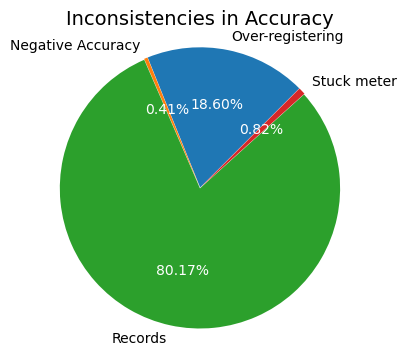

In [27]:
# Visualization of the Inconsistencies in the Accuracy Field from the sample dataset
divisions = ['Over-registering', 'Negative Accuracy', 'Records', 'Stuck meter']
values = [365, 8, 1573, 16]  # Percentage values for each division
myexplode=[0.001, 0.001, 0.001, 0.001]
plt.figure(figsize = (4,4))

# Create a pie chart
pie_chart = plt.pie(values, labels=divisions, autopct='%1.2f%%',radius=0.3, startangle=45, 
        explode=myexplode, shadow=False, textprops={'color': 'white'})

# Set aspect ratio to be equal, creating a circle.
plt.axis('equal')

# Manually set label color to black
for text in pie_chart[1]:
    text.set_color('black')

# Set the Title
plt.title('Inconsistencies in Accuracy', fontsize=14)

# Display the pie chart
plt.show();

In [28]:
# Fix the Negative and Over-registering accuracy
# Negative accuracy + 100
# Over-registering = 100
mask1 = data_raw['accuracy'] < 0
mask2 = data_raw['accuracy'] > 100
data_raw.loc[mask1, 'accuracy'] += 100
data_raw.loc[mask2, 'accuracy'] = 100
data_raw.head()

,meterID,testYear,installationYear,meterSizeOriginal,meterMake,accuracy,age,meterSize
0,1,2019,1990,0.625,BLUE,98.78,30,5/8 Inch
1,2,2019,2008,0.625,BLUE,0.00,12,5/8 Inch
2,3,2019,1998,0.625,BLUE,99.01,22,5/8 Inch
3,4,2019,1996,0.625,BLUE,99.95,24,5/8 Inch
4,5,2019,2003,0.625,RED,99.91,17,5/8 Inch


#### **Remove Stuck meters records from the dataset**

In [29]:
# Filtering rows based on conditions to select only the data with accuracy values ranging from greater than 0% to 100%
data_raw = data_raw[(data_raw['accuracy'] > 0) & (data_raw['accuracy'] <= 100)]
data_raw.head()

,meterID,testYear,installationYear,meterSizeOriginal,meterMake,accuracy,age,meterSize
0,1,2019,1990,0.625,BLUE,98.78,30,5/8 Inch
2,3,2019,1998,0.625,BLUE,99.01,22,5/8 Inch
3,4,2019,1996,0.625,BLUE,99.95,24,5/8 Inch
4,5,2019,2003,0.625,RED,99.91,17,5/8 Inch
5,6,2019,1998,0.625,BLUE,98.75,22,5/8 Inch


In [30]:
# Size of the sample dataset after removing the Stuck meters
data_raw.value_counts().sum()

1946

#### **Descriptive Analysis of the sample dataset: Meter Test**

In [31]:
# Description of the dataset: Meter Test
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1968
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   meterID            1946 non-null   int64  
 1   testYear           1946 non-null   int64  
 2   installationYear   1946 non-null   int64  
 3   meterSizeOriginal  1946 non-null   object 
 4   meterMake          1946 non-null   object 
 5   accuracy           1946 non-null   float64
 6   age                1946 non-null   int64  
 7   meterSize          1946 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 136.8+ KB


In [32]:
# We created a clean dataframe for our analysis, excluding the 'meterSizeOriginal' column
df = data_raw.copy()
df = df.drop(columns=['meterSizeOriginal'])
df.head(3)

,meterID,testYear,installationYear,meterMake,accuracy,age,meterSize
0,1,2019,1990,BLUE,98.78,30,5/8 Inch
2,3,2019,1998,BLUE,99.01,22,5/8 Inch
3,4,2019,1996,BLUE,99.95,24,5/8 Inch


In [33]:
# Summary statistics of the sample dataset
df.loc[:,['installationYear','accuracy','age']].describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
installationYear,1946.0,1997.24,14.20,1942.00,1993.00,2000.00,2006.00,2020.0
accuracy,1946.0,96.87,8.64,1.13,98.03,99.08,99.83,100.0
age,1946.0,22.76,14.20,0.00,14.00,20.00,27.00,78.0


#### **Installation Year**

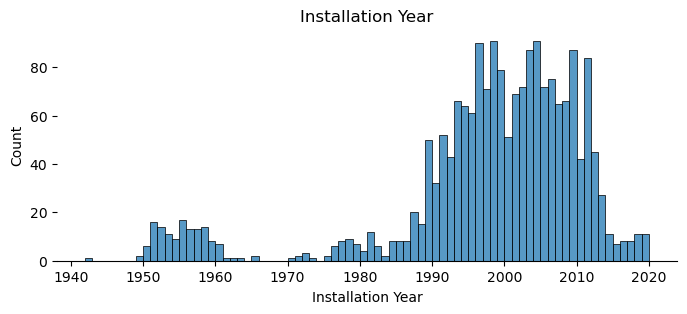

In [34]:
# Histogram of Installation Year
fig, ax1 = plt.subplots(figsize=(8, 3))
sns.despine(left=True)

sns.histplot(df['installationYear'], ax=ax1, 
             bins=range(df['installationYear'].min(), df['installationYear'].max() + 1), stat='count')

ax1.set(xlabel='Installation Year', ylabel='Count', title='Installation Year')
plt.show()

**Installation Year**
>* We observed that the initial installations date back to 1942, with the majority of meters installed during the period from 1990 to 2012, and between 1950 and 1960.
>* We observe a bimodal distribution with two distinct peaks, indicating a left-skewed pattern. The dataset spans a range of 78 years, capturing records from different periods.
>* The peak year for installations occurred in 1998 and 2004, with a total of 91 completed installations.

In [35]:
# The first three years with the highest installation rates
df['installationYear'].value_counts().head(3)

1998    91
2004    91
1996    90
Name: installationYear, dtype: int64

#### **Accuracy**

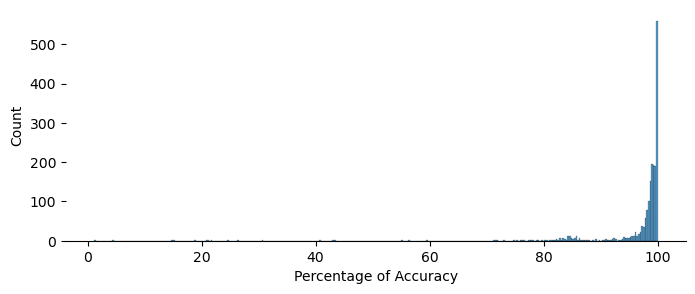

In [36]:
# Histogram of Accuracy
fig, ax2 = plt.subplots(figsize=(8,3))
sns.despine(left=True)
sns.histplot(df['accuracy'], ax=ax2)
ax2.set(xlabel='Percentage of Accuracy');

**Accuracy**
>* Interquartile range (IQR) = Q3 - Q1 = 1.80. It's a small value, which indicates low variability in the central part of the data. The majority of the data is concentrated between 98.03% and 99.83% accuracy.
>* We observe that the mean value (96.87%) is slightly lower than the median (99.08%) value. This suggests a negatively skewed distribution.
>* The mean accuracy of the dataset is 96.87%, the median of 99.08%, and a minimum of 1.13%.

#### **Age**

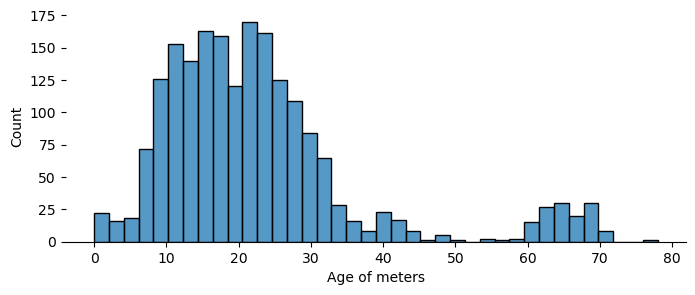

In [37]:
# Histogram of Age
fig, ax3 = plt.subplots(figsize=(8,3))
sns.despine(left=True)
sns.histplot(df['age'], ax=ax3)
ax3.set(xlabel='Age of meters');

**Age**
>* The age range of the meters spans 78 years
>* On average, the meters are 22.76 years old, with the oldest one reaching 78 years.
>* The majority of meters range from 9 to 30 years old since installation, with 16 and 22 years being the most common age.

In [38]:
# The ages of the first three installations with the highest frequency.
df['age'].value_counts().head(3)

22    91
16    91
24    90
Name: age, dtype: int64

In [39]:
# Correlation between Accuracy and Age
corr= df.loc[:,['accuracy','age']].corr()
corr

,accuracy,age
accuracy,1.00000,-0.26002
age,-0.26002,1.00000


The correlation coefficient indicates a low negative correlation between the accuracy of meters and their age. This implies that as meters get older, they also become less accurate; however, this relationship is not particularly strong in reality.

#### **Explanatory Analysis**

##### **Meter Makes vs Accuracy and Age**

In [40]:
# Summary Statistics for meterMake vs accuracy and age
list1 = ['accuracy','age']
df_make = df.groupby('meterMake')[list1].describe().round(2)

# Define a function for conditional formatting
def highlight_condition(value):
    if value == df_make.iloc[0:1,0:1].values:
        return 'background-color: #ADD8E6' # Light Blue
    if value == df_make.iloc[2:3,5:6].values:
        return 'background-color: #ADD8E6' # Light Blue
    if value == df_make.iloc[1:2,5:6].values:
        return 'background-color: red'
    if value == df_make.iloc[1:2,3:4].values:
        return 'background-color: red'
    if value == df_make.iloc[1:2,2:3].values:
        return 'background-color: red'
    if value == df_make.iloc[1:2,15:16].values:
        return 'background-color: #90EE90' # Light Green
    if value == df_make.iloc[1:2,9:10].values:
        return 'background-color: #90EE90' # Light Green
    
    else:
        return ''

# Apply the conditional formatting to the DataFrame
styled_df_make = df_make.style.applymap(highlight_condition)

# Round the values in the DataFrame after applying styling
rounded_styled_df_make = styled_df_make.format('{:.2f}')

# Display the styled and rounded DataFrame
rounded_styled_df_make

>* Accuracy Comparison: Among the meter makes, Red stands out as the most reliable, with higher median accuracy. Conversely, Green meters exhibit a lower accuracy rate.
>* Green make represents the lowest accuracy and a higher standard deviation, which indicates a more dispersed accuracy.
>* Age and Meter Reliability: The Green meter make corresponds to the older meters in the dataset and higher mean.

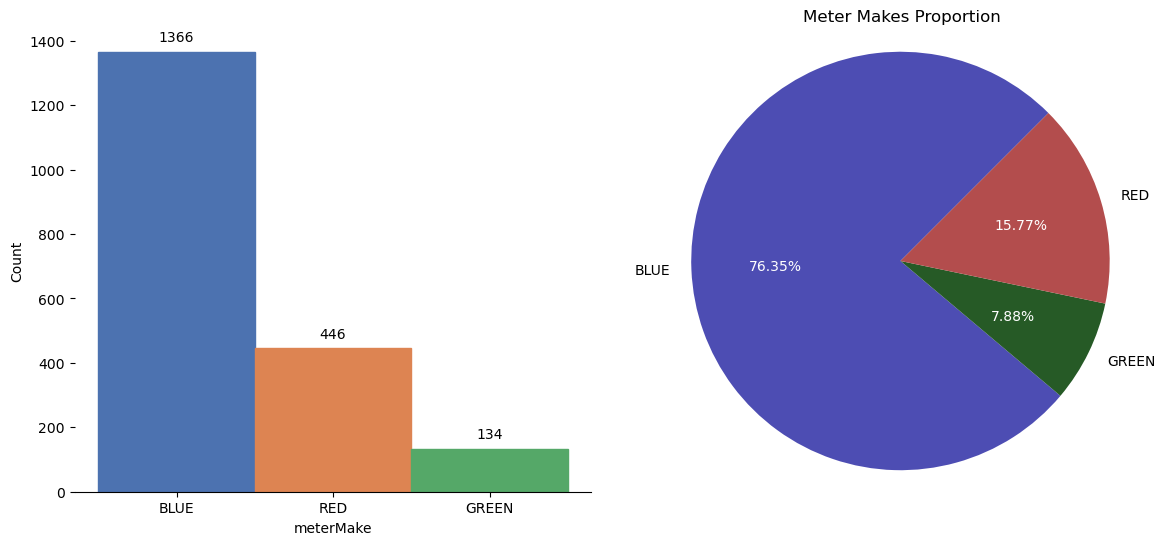

In [41]:
# Histogram and Pie chart of Meters Make in our sample dataset
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
from matplotlib.colors import to_rgba

# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot histogram
colors = sns.color_palette("deep", n_colors=3, desat=1)
sns.despine(left=True)
ax1 = sns.histplot(df['meterMake'], ax=ax1)
for i, bar in enumerate(ax1.patches):
    bar.set_color(colors[i])
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax1.set(xlabel='meterMake', ylabel='Count')

# Plot pie chart
divisions = ['BLUE', 'GREEN', 'RED']
values = [1201, 124, 248]
myexplode = [0, 0, 0]
base_colors = ['blue', 'green', 'red']
adjusted_colors = [colorsys.rgb_to_hls(*to_rgba(color)[:3]) for color in base_colors]
adjusted_colors = [colorsys.hls_to_rgb(h, l, 0.4) for h, l, s in adjusted_colors]
# Create a pie chart
wedges, texts, autotexts = ax2.pie(values, labels=divisions, autopct='%1.2f%%', radius=0.3, startangle=45,
                                   explode=myexplode, shadow=False, textprops={'color': 'white'}, colors=adjusted_colors)
# Set aspect ratio to be equal, creating a circle.
ax2.axis('equal')
# Set the Title
ax2.set_title('Meter Makes Proportion', fontsize=12)
# Set label color to black
for text in texts:
    text.set_color('black')

plt.subplots_adjust(wspace=0.1)
plt.show()

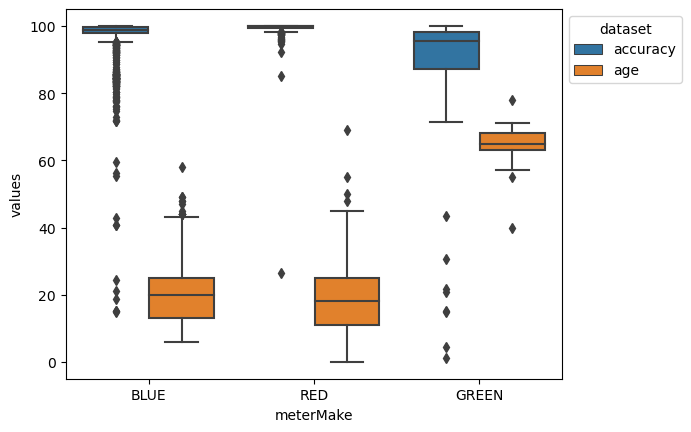

In [42]:
# Boxplot of the Meter Make with Accuracy and Age
# df_ = data.loc[:, data.columns != ['meterID','testYear','meterSIzeOriginal','meterSize']]
df_ = df.loc[:, ['meterMake','accuracy','age']]
data3 = df_.melt(['meterMake'], var_name='dataset', value_name='values')

sns.boxplot(data=data3, x='meterMake', y='values', hue='dataset')
plt.legend(title='dataset', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('meterMake');

> **Accuracy**
>>* The dots outside the whiskers indicate outliers, more prominent for the Blue and Green makes, indicating poor accuracy.<br>
>>* Small boxes indicate less variability in the central part of the data, where the data is closely clustered around the median value. This suggests that the accuracy median is a representative measure for accuracy.
>>* Small whiskers indicate a narrow range between the minimum and maximum values, suggesting that the values are closely packed together.

> **Age**
>>* The Blue and Red makes exhibit similar aging, while the Green make features older meters.

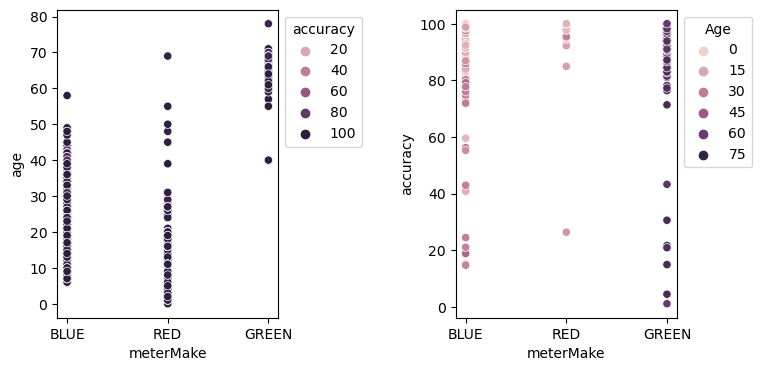

In [43]:
# Scatterplots of Meter Make for Age and Accuracy
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 1nd Plot
g1 = sns.scatterplot(data=df, x='meterMake', y='age', hue='accuracy', ax=ax1)
ax1.set(ylabel='age')
g1.legend(loc='upper left',bbox_to_anchor=(1,1), title='accuracy');

# 2nd Plot
g2 = sns.scatterplot(data=df, x='meterMake', y='accuracy', hue='age', ax=ax2)
ax2.set(ylabel='accuracy')
g2.legend(loc='upper left',bbox_to_anchor=(1,1), title='Age');

# Adjust the space between both plots
plt.subplots_adjust(wspace=0.8)
plt.show();

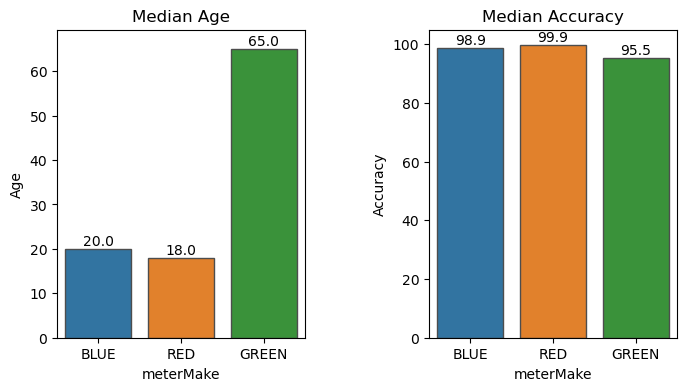

In [44]:
# Barplots of Meter Make vs. Median Age and Accuracy values in the sample dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Barplots of Meter Make vs. Age and Accuracy median values in the sample dataset
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 1st Plot - Median Age
g1 = sns.barplot(x='meterMake', y='age', data=df, estimator=np.median, errwidth=0, edgecolor=".3", ax=ax1)
# add the annotation
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.1f', label_type='edge')
ax1.set(ylabel='Age')
ax1.set(title='Median Age')

# 2nd Plot - Median Accuracy
g2 = sns.barplot(x='meterMake', y='accuracy', data=df, estimator=np.median, errwidth=0, edgecolor=".3", ax=ax2)
# add the annotation
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.1f', label_type='edge')
ax2.set(ylabel='Accuracy')
ax2.set(title='Median Accuracy')

# Adjust the space between both plots
plt.subplots_adjust(wspace=0.5)
plt.show()

##### **Meter Size vs Accuracy and Age**

In [45]:
# Summary Statistics of Meter Size vs Accuracy and Age
list1 = ['accuracy','age']
df_size = df.groupby('meterSize')[list1].describe().round(2)

# Define a function for conditional formatting
def highlight_condition(value):
    if value == df_size.iloc[2:3,0:1].values:
        return 'background-color: #ADD8E6' # Light Blue
    if value == df_size.iloc[2:3,2:3].values:
        return 'background-color: #ADD8E6' # Light Blue
    if value == df_size.iloc[2:3,3:4].values:
        return 'background-color: red'
    if value == df_size.iloc[2:3,15:16].values:
        return 'background-color: #90EE90' # Light Green
    if value == df_size.iloc[2:3,9:10].values:
        return 'background-color: #90EE90' # Light Green
    if value == df_size.iloc[0:1,15:16].values:
        return 'background-color: #90EE90' # Light Green
    
    else:
        return ''

# Apply the conditional formatting to the DataFrame
styled_df_size = df_size.style.applymap(highlight_condition)

# Round the values in the DataFrame after applying styling
rounded_styled_df_size = styled_df_size.format('{:.2f}')

# Display the styled and rounded DataFrame
rounded_styled_df_size

**Accuracy**
>* The most installed meter size in the sample dataset is the 5/8 inches variant
>* The 5/8 inches meter size has the highest standard deviation. This suggests a wider dispersion of values around the mean, indicating greater variability.
>* The 5/8 inches size shows the highest range, highlighting a significant level of variation and potential losses.

**Age**
>* The 5/8 inch meters show that they are, on average, older compared to the other two sizes.
>* The range of ages for each meter size is as follows:<br>
>>1 inch: range = 50 years<br>
3/4 inch: range = 9 years<br>
5/8 inch: range = 78 years

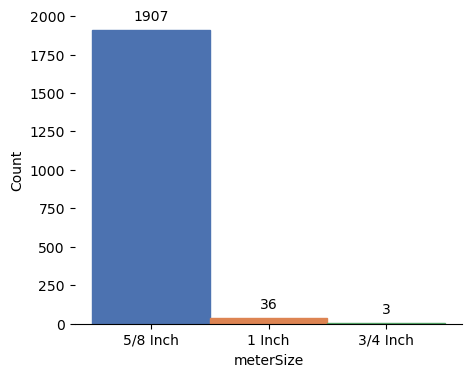

In [46]:
# Histogram of Meter Size in our sample dataset

# Define a color palette with lower saturation
colors = sns.color_palette("deep", n_colors=3, desat=1)

# Create a histogram
fig, ax1 = plt.subplots(figsize=(5, 4))
sns.despine(left=True)

# Plot the histogram
ax1 = sns.histplot(df['meterSize'], ax=ax1)

# Assign colors to the bars
for i, bar in enumerate(ax1.patches):
    bar.set_color(colors[i])

# Add labels to the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax1.set(xlabel='meterSize', ylabel='Count')
plt.show();

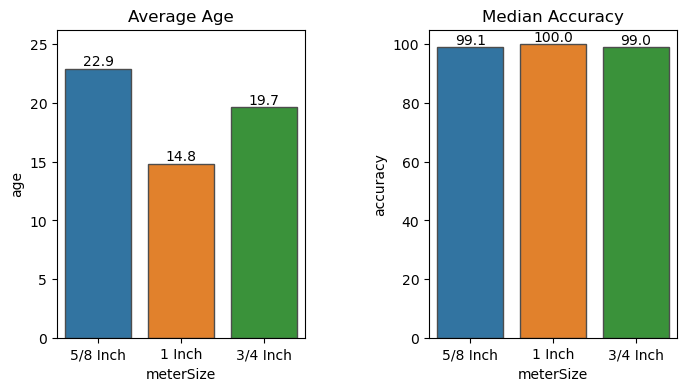

In [47]:
# Barplots of Meter Size for average Age and median Accuracy
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 1nd Plot
g1 = sns.barplot(x='meterSize', y='age', data=df, errwidth=0, edgecolor=".3", ax=ax1)
# add the annotation
for i in ax1.containers:
    ax1.bar_label(i,fmt='%.1f', label_type='edge')
ax1.set(ylabel='age')
ax1.set(title='Average Age');

# 2nd Plot
g2 = sns.barplot(x='meterSize', y='accuracy', data=df, estimator=np.median, errwidth=0, edgecolor=".3", ax=ax2)
# add the annotation
for i in ax2.containers:
    ax2.bar_label(i,fmt='%.1f', label_type='edge')
ax2.set(ylabel='accuracy')
ax2.set(title='Median Accuracy')

plt.subplots_adjust(wspace=0.5)   # Adjust the space between both plots
plt.show();

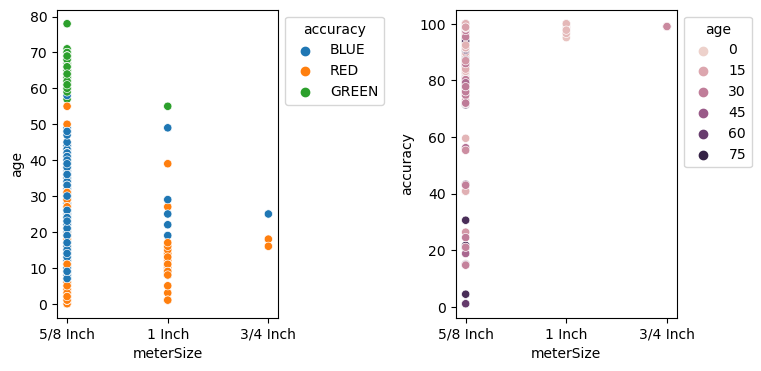

In [48]:
# Scatterplots of Meter Size vs. Age and Accuracy
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 1nd Plot
g1 = sns.scatterplot(data=df, x='meterSize', y='age', hue='meterMake', ax=ax1)
ax1.set(ylabel='age')
g1.legend(loc='upper left',bbox_to_anchor=(1,1), title='accuracy');

# 2nd Plot
g2 = sns.scatterplot(data=df, x='meterSize', y='accuracy', hue='age', ax=ax2)
ax2.set(ylabel='accuracy')
g2.legend(loc='upper left',bbox_to_anchor=(1,1), title='age');

plt.subplots_adjust(wspace=0.8)   # Adjust the space between both plots
plt.show();

##### **Meter Makes and Size vs Accuracy and Age**

In [49]:
# Summary Statistics of Meter Make and Size vs Accuracy and Age
list1 = ['accuracy','age']
df1 = df.groupby(['meterMake','meterSize'])[list1].describe().round(2)

# Define a function for conditional formatting
def highlight_condition(value):
    if value == df1.iloc[4:5,3:4].values:
        return 'background-color: red'
    if value == df1.iloc[2:3,3:4].values:
        return 'background-color: yellow'
    if value == df1.iloc[7:8,3:4].values:
        return 'background-color: yellow'
    if value == df1.iloc[0:1,0:1]['accuracy'].values:
        return 'background-color: #ADD8E6'  # Light Blue
    if value == df1.iloc[1:2,0:1].values:
        return 'background-color: #ADD8E6'  # Light Blue
    if value == df1.iloc[4:5,15:16].values:
        return 'background-color: #90EE90'  # Light Green
    if value == df1.iloc[7:8,15:16].values:
        return 'background-color: #90EE90'  # Light Green
    if value == df1.iloc[3:4,11:12].values:
        return 'background-color: #90EE90'  # Light Green
    if value == df1.iloc[4:5,11:12].values:
        return 'background-color: #90EE90'  # Light Green
    if value == df1.iloc[4:5,5:6].values:
        return 'background-color: red'
    if value == df1.iloc[6:7,0:1]['accuracy'].values:
        return 'background-color: #ADD8E6'  # Light Blue
    
    else:
        return ''

# Apply the conditional formatting to the DataFrame
styled_df1 = df1.style.applymap(highlight_condition)

# Round the values in the DataFrame after applying styling
rounded_styled_df1 = styled_df1.format('{:.2f}')

# Display the styled and rounded DataFrame
rounded_styled_df1

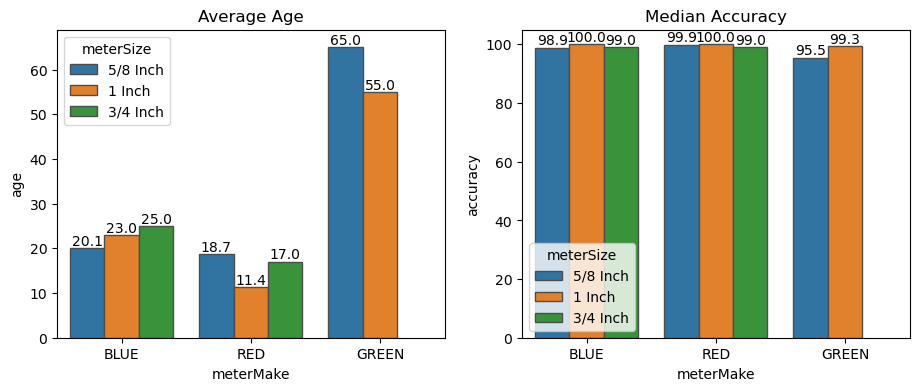

In [52]:
# Barplots of Meter Make and Size vs. Average Age and Median Accuracy
import warnings
warnings.filterwarnings('ignore')

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

# 1nd Plot
g1 = sns.barplot(x='meterMake', y='age', data=df, hue='meterSize', errwidth=0, edgecolor=".3", ax=ax1)
# add the annotation
for i in ax1.containers:
    ax1.bar_label(i,fmt='%.1f', label_type='edge')
ax1.set(ylabel='age')
ax1.set(title='Average Age');

# 2nd Plot
g2 = sns.barplot(x='meterMake', y='accuracy', data=df, hue='meterSize', estimator=np.median, errwidth=0, edgecolor=".3", ax=ax2)
# add the annotation
for i in ax2.containers:
    ax2.bar_label(i,fmt='%.1f', label_type='edge')
ax2.set(ylabel='accuracy')
ax2.set(title='Median Accuracy');

# Adjust the space between both plots
plt.subplots_adjust(wspace=0.2)
plt.show();

>* The green make shows the older meters for the 1-inch and 5/8-inch sizes.
>* Excluding outliers, the accuracy for all meters falls within the range of their tolerance, except for the Green make with a 5/8-inch meter, which is lower. This lower accuracy could be attributed to the fact that the Green make comprises older meters in our sample data.

#### **Final Analysis**

* What is the estimated volume and value of water lost to small meter inaccuracy in 2019?
* What might you recommend for SWU to maintain their customer meter going forward based on the data provided? Consider meter replacement decisions.

In [53]:
# Visual of the dataset 'Summary Customer Usage'
data_sum_cus

,Meter Make,Total 2019 Recorded Usage (CCF),Count of Meters Currently in Service
0,RED,28576886,172745
1,BLUE,23316556,166182
2,GREEN,2094991,13897


Data frame defitions:<br>
> **Meter Make**: The make of the meter (blue, green, or red)<br>
**Total 2019 Recorded Usage (CCF)**: The total volume recorded by each meter make in the 2019 calendar year aggregated from billing records<br>
**Count of Meter Currently in Service**: The total count of meters currently in service in the system by meter make

Parameters:<br>
> **Customer Retail Unit Cost: \$5.09/CCF**: The customer retail unit cost represents the price the managing utility charges per CCF of water sold. Therefore, any lost revenue due to meter inaccuracy could be valued at this rate<br>
**Cost to Replace a Customer Meter: $150/meter**: The full cost of customer meter replacement including staff time, equipment, and purchase of a new replacement meter

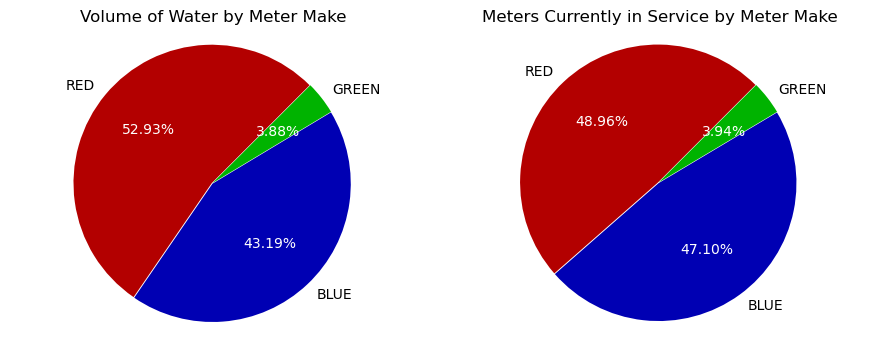

In [54]:
# Pie Charts of Proportions of Volume of Water Usage and Meter Currently in Service
import colorsys

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

# 1st Pie: Volume Proportion by Meter Make in 2019
divisions1 = data_sum_cus['Meter Make'].tolist()
values1 = data_sum_cus['Total 2019 Recorded Usage (CCF)'].tolist()
myexplode=[0.001, 0.001, 0.001]

# Specify custom colors (RGB values) for red, blue, and green
custom_colors_rgb = [(1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 1.0, 0.0)]

# Adjust brightness while keeping the distinctiveness of colors
custom_colors_dim = [colorsys.rgb_to_hsv(*rgb) for rgb in custom_colors_rgb]
brightness_factor = 0.7  # Adjust this value to control brightness

# Update the Value component to adjust brightness
custom_colors_dim = [(h, s, v * brightness_factor) for h, s, v in custom_colors_dim]

# Convert back to RGB
custom_colors_dim = [colorsys.hsv_to_rgb(h, s, v) for h, s, v in custom_colors_dim]

# Create a pie chart
ax1.pie(values1, labels=divisions1, autopct='%1.2f%%',radius=0.3, startangle=45, 
        explode=myexplode, shadow=False, textprops={'color': 'black'}, colors=custom_colors_dim)

# Set aspect ratio to be equal, creating a circle.
ax1.axis('equal')

# Manually set inside label color to white
for text in ax1.texts:
    if text.get_text().endswith('%'):
        text.set_color('white') 
# Set the Title
ax1.set_title('Volume of Water by Meter Make', fontsize=12)

# 2nd Pie: Meter Proportion by Meter Make in 2019
divisions2 = data_sum_cus['Meter Make'].tolist()
values2 = data_sum_cus['Count of Meters Currently in Service'].tolist()
myexplode=[0.001, 0.001, 0.001]

# Create a pie chart
ax2.pie(values2, labels=divisions2, autopct='%1.2f%%',radius=0.3, startangle=45, 
        explode=myexplode, shadow=False, textprops={'color': 'black'}, colors=custom_colors_dim)

# Set aspect ratio to be equal, creating a circle.
ax2.axis('equal')

# Manually set inside label color to white
for text in ax2.texts:
    if text.get_text().endswith('%'):
        text.set_color('white')    
    
# Set the Title
ax2.set_title('Meters Currently in Service by Meter Make', fontsize=12)

# Adjust the space between both plots
plt.subplots_adjust(wspace=0.1)

# Display the pie chart
plt.show();

>* The Red make is the most reliable meter and handles the highest volume of water.
>* The Green make represents less than 4% of the water volume and meters in service, having the least accuracy and featuring older meters.
>* Both Blue and Green makes have the highest number of outliers, accounting for half of the meters.

##### **Assumption**

We operate under the assumption that our findings from the sample data can be extrapolated to represent the entire population under study. To achieve this, we will consider the accuracy values determined for specific makes as indicative of the accuracy for the entire population of meters. This approach will be instrumental in estimating the volume and value of water lost to the customer meters.

In [55]:
# Dataframe with the mean and median values of accuracy and age

# Median Meter Make dataframe
list1 = ['accuracy','age']
df2_median = df.groupby('meterMake')[list1].median()
df2_median.rename(columns={'accuracy':'accuracy_median', 'age':'age_median'}, inplace=True)

# Mean Meter Make dataframe
df3_mean = df.groupby('meterMake')[list1].mean().round(2)
df3_mean.rename(columns={'accuracy':'accuracy_mean', 'age':'age_mean'}, inplace=True)

df4 = pd.concat([df2_median, df3_mean], axis=1).round(2)

# Reindex the DataFrame with the desired order
desired_order = ['RED', 'BLUE', 'GREEN']
df4.reindex(desired_order)

,accuracy_median,age_median,accuracy_mean,age_mean
meterMake,,,,
RED,99.92,18.0,99.32,18.26
BLUE,98.93,20.0,96.83,20.10
GREEN,95.50,65.0,89.17,64.93


##### **Using the Median values**

In [56]:
# Inaccuracy (or loss) per Meter Make (in percentage) from the median values
inaccuracy_meter_make_median = (100 - df4['accuracy_median']).sort_values()
inaccuracy_meter_make_median

meterMake
RED      0.08
BLUE     1.07
GREEN    4.50
Name: accuracy_median, dtype: float64

In [57]:
# Add new column 'Inaccuaracy' to dataframe 'data_sum_cus'
data_sum_cus['Inaccuracy_median'] = inaccuracy_meter_make_median.sort_values().values
data_sum_cus

,Meter Make,Total 2019 Recorded Usage (CCF),Count of Meters Currently in Service,Inaccuracy_median
0,RED,28576886,172745,0.08
1,BLUE,23316556,166182,1.07
2,GREEN,2094991,13897,4.50


In [58]:
# Estimate of Volume of Water loss per Meter Make (from the median inaccuracy)
data_sum_cus['Volume_Loss_median'] = (data_sum_cus['Total 2019 Recorded Usage (CCF)'] * (data_sum_cus['Inaccuracy_median']/100)).values.round(2)
data_sum_cus

,Meter Make,Total 2019 Recorded Usage (CCF),Count of Meters Currently in Service,Inaccuracy_median,Volume_Loss_median
0,RED,28576886,172745,0.08,22861.51
1,BLUE,23316556,166182,1.07,249487.15
2,GREEN,2094991,13897,4.50,94274.60


In [59]:
# Total Volume of water Loss (median) in 2019
total_water_loss_median = data_sum_cus['Volume_Loss_median'].values.sum()
print(f'Total water loss (median values): {total_water_loss_median:,}')

Total water loss (median values): 366,623.26


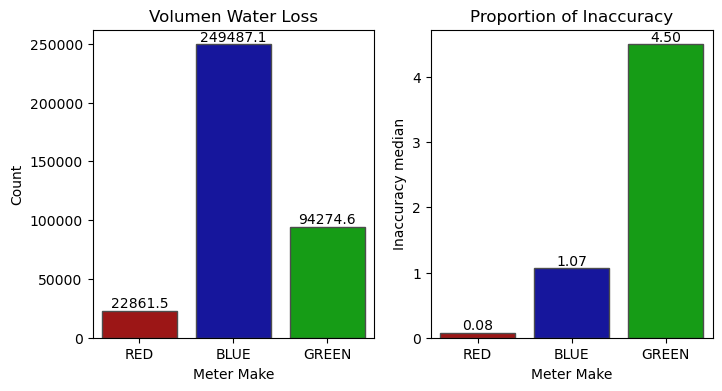

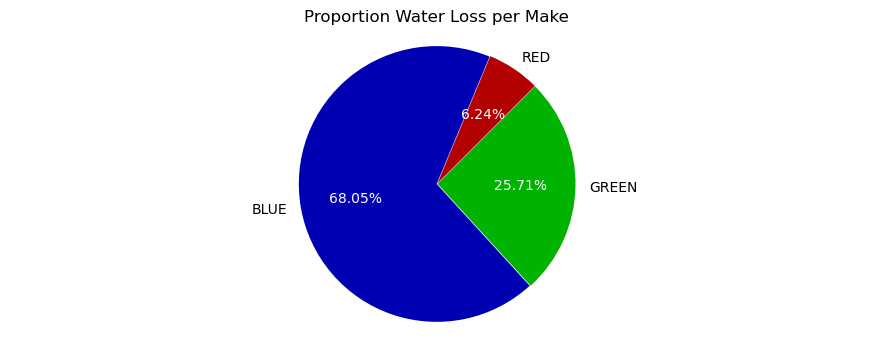

In [60]:
# Barplots of Meter Make for Volumen of Water Loss and Proportion of Inaccuracy

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Specify custom colors (RGB values) for red, blue, and green
custom_colors_rgb = [(1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 1.0, 0.0)]

# Adjust brightness while keeping the distinctiveness of colors
custom_colors_dim = [colorsys.rgb_to_hsv(*rgb) for rgb in custom_colors_rgb]
brightness_factor = 0.7  # Adjust this value to control brightness

# Update the Value component to adjust brightness
custom_colors_dim = [(h, s, v * brightness_factor) for h, s, v in custom_colors_dim]

# Convert back to RGB
custom_colors_dim = [colorsys.hsv_to_rgb(h, s, v) for h, s, v in custom_colors_dim]

# 1nd Plot
g1 = sns.barplot(x='Meter Make', y='Volume_Loss_median', data=data_sum_cus, palette=custom_colors_dim, errwidth=0, edgecolor=".3", ax=ax1)
# add the annotation
for i in ax1.containers:
    ax1.bar_label(i,fmt='%.1f', label_type='edge')
ax1.set(ylabel='Count')
ax1.set(title='Volumen Water Loss');

# 2nd Plot
g2 = sns.barplot(x='Meter Make', y='Inaccuracy_median', data=data_sum_cus, estimator=np.median,palette=custom_colors_dim, errwidth=0, edgecolor=".3", ax=ax2)
# add the annotation
for i in ax2.containers:
    ax2.bar_label(i,fmt='%.2f', label_type='edge')
ax2.set(ylabel='Inaccuracy median')
ax2.set(title='Proportion of Inaccuracy')

# Pie chart: Volume Proportion by Meter Make in 2019
divisions1 = data_sum_cus['Meter Make'].tolist()
values1 = data_sum_cus['Volume_Loss_median'].tolist()
myexplode=[0.001, 0.001, 0.001]

fig, ax3 = plt.subplots(figsize=(11, 4))

# Create a pie chart
ax3.pie(values1, labels=divisions1, autopct='%1.2f%%',radius=0.3, startangle=45, 
        explode=myexplode, shadow=False, textprops={'color': 'black'}, colors=custom_colors_dim)

# Set aspect ratio to be equal, creating a circle.
ax3.axis('equal')

# Manually set inside label color to white
for text in ax3.texts:
    if text.get_text().endswith('%'):
        text.set_color('white') 
# Set the Title
ax3.set_title('Proportion Water Loss per Make', fontsize=12)

# Adjust the space between both plots
plt.subplots_adjust(wspace=0.5)
plt.show();

In [61]:
# Total Water Usage in 2019
total_water_usage = data_sum_cus['Total 2019 Recorded Usage (CCF)'].sum()
print(f'Total Water Usage: {total_water_usage:,}')

Total Water Usage: 53,988,433


In [62]:
# Percentage of Water Loss compared to the total water usage (median)
water_loss_median_perc = (100*total_water_loss_median/total_water_usage).round(2)
print(f'Percentage of water loss (median values) in 2019: {water_loss_median_perc}%')

Percentage of water loss (median values) in 2019: 0.68%


By the median values, only 0.68% of the total water usage was loss due to inaccuracy in the meter readings.

In [63]:
# Total Loss in dollars (median values)
# Customer Retail Unit Cost: $5.09/CCF
customer_unit_cost = 5.09
total_loss_median = (customer_unit_cost * total_water_loss_median).round(2)
print(f'Estimate of the total loss (median values) in 2019 was: ${total_loss_median:,}')

Estimate of the total loss (median values) in 2019 was: $1,866,112.39


This is just an estimation based on the sample provided. We took the median of the accuracy from the sample and we extrapolated to the whole population of meters. From that extrapolation we calculated how much volumen of water was lost per make of meter, we aggregted those values to get the total volumen of water lost in 2019. By multipling by the rate of volumen of water we got how much it was the billing system under charging the customers.<br>
We can not take those numbers seriourly because is only an extrapolation of a small sample of meters and we don't know exactly how much water passed through each individual meter.

##### **Using the Mean values**

In [64]:
# Inaccuracy per Meter Make (in percentage) from the mean values
inaccuracy_meter_make_mean = (100 - df4['accuracy_mean']).sort_values()
inaccuracy_meter_make_mean

meterMake
RED       0.68
BLUE      3.17
GREEN    10.83
Name: accuracy_mean, dtype: float64

In [65]:
# Add new column 'Inaccuaracy' to dataframe 'data_sum_cus'
data_sum_cus['Inaccuracy_mean'] = inaccuracy_meter_make_mean.sort_values().values
data_sum_cus

,Meter Make,Total 2019 Recorded Usage (CCF),Count of Meters Currently in Service,Inaccuracy_median,Volume_Loss_median,Inaccuracy_mean
0,RED,28576886,172745,0.08,22861.51,0.68
1,BLUE,23316556,166182,1.07,249487.15,3.17
2,GREEN,2094991,13897,4.50,94274.60,10.83


In [66]:
# Estimate of Volume of Water loss per Meter Make (from the mean inaccuracy)
data_sum_cus['Volume_Loss_mean'] = (data_sum_cus['Total 2019 Recorded Usage (CCF)'] * (data_sum_cus['Inaccuracy_mean']/100)).values.round(2)
data_sum_cus

,Meter Make,Total 2019 Recorded Usage (CCF),Count of Meters Currently in Service,Inaccuracy_median,Volume_Loss_median,Inaccuracy_mean,Volume_Loss_mean
0,RED,28576886,172745,0.08,22861.51,0.68,194322.82
1,BLUE,23316556,166182,1.07,249487.15,3.17,739134.83
2,GREEN,2094991,13897,4.50,94274.60,10.83,226887.53


In [67]:
# Total Volume of water Loss (mean values)
total_water_loss_mean = data_sum_cus['Volume_Loss_mean'].values.sum()
print(f'Total water loss by the mean values: {total_water_loss_mean:,}')

Total water loss by the mean values: 1,160,345.18


In [68]:
# Percentage of Water Loss compared to the total water usage (mean)
water_loss_mean_perc = (100*total_water_loss_mean/total_water_usage).round(2)
print(f'Percentage of water loss by mean in 2019: {water_loss_mean_perc}%')

Percentage of water loss by mean in 2019: 2.15%


By the mean values, only 2.15% of the total water usage was loss due to inaccuracy.

In [69]:
# Total Loss in dollars (median)
# Customer Retail Unit Cost: $5.09/CCF
customer_unit_cost = 5.09
total_loss_mean = (customer_unit_cost * total_water_loss_mean).round(2)
print(f'Estimate of the total loss by the mean in 2019 was: ${total_loss_mean:,}')

Estimate of the total loss by the mean in 2019 was: $5,906,156.97


In [70]:
# Difference of Estimates considering the median or mean values
diff = total_loss_mean - total_loss_median
print(f'Difference in dollars from taking the mean values instead of the median: ${diff:,}')

Difference in dollars from taking the mean values instead of the median: $4,040,044.58


#### **Example Case**

We consider a scenario in which we aim to replace all meters falling below a certain accuracy threshold in our sample dataset.

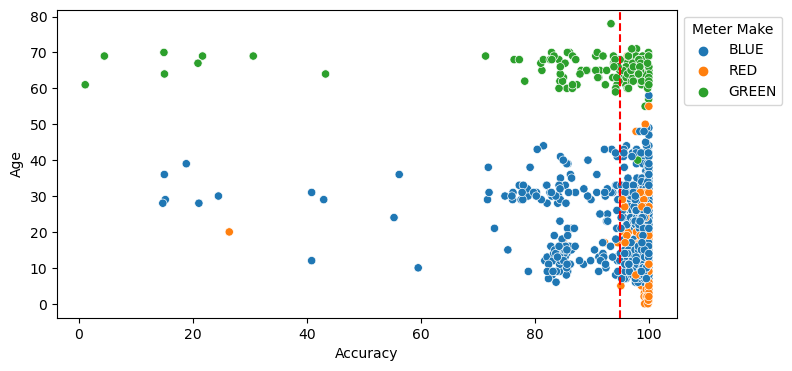

In [71]:
# Scatterplot of Age vs. Accuracy per Make with a 95% accuracy
fig, ax8 = plt.subplots(figsize=(8, 4))

g8 = sns.scatterplot(data=df, x='accuracy', y='age', hue='meterMake', ax=ax8)

# Add horizontal line at y = 40 years of age
#plt.axhline(y=40, color='g', linestyle='--')

# Add vertical line at x = 95%
plt.axvline(x=95, color='r', linestyle='--')

# Add label and legend
ax8.set(xlabel='Accuracy')
ax8.set(ylabel='Age')
g8.legend(loc='upper left',bbox_to_anchor=(1,1), title='Meter Make');

In [72]:
# Meters with accuracy of 95% or below in our sample
meter_replace = df.loc[df['accuracy']<=95][['meterID','meterMake','meterSize']]
print(f'Meters with 95% accuracy or lower = {meter_replace["meterID"].count()}\n')
print(f"Meter Makes with 95% accuracy or lower: \n{meter_replace.groupby('meterMake')['meterSize'].count()}\n")
print(f"Meter Size with 95% accuracy or lower: \n{meter_replace.groupby('meterSize')['meterMake'].count()}")

Meters with 95% accuracy or lower = 236

Meter Makes with 95% accuracy or lower: 
meterMake
BLUE     167
GREEN     65
RED        4
Name: meterSize, dtype: int64

Meter Size with 95% accuracy or lower: 
meterSize
5/8 Inch    236
Name: meterMake, dtype: int64


In [73]:
# List of meterID with 95% or less accuracy
print(df.loc[df['accuracy']<=95]['meterID'].to_list())

[12, 14, 18, 34, 36, 45, 83, 93, 99, 104, 108, 118, 121, 144, 152, 166, 170, 171, 181, 186, 191, 196, 200, 205, 217, 218, 226, 241, 246, 259, 263, 272, 276, 282, 294, 297, 301, 316, 323, 325, 334, 352, 370, 371, 404, 408, 410, 416, 418, 420, 425, 446, 465, 473, 476, 487, 490, 498, 499, 529, 536, 551, 571, 574, 592, 615, 619, 645, 648, 658, 660, 668, 669, 674, 677, 690, 691, 700, 705, 716, 721, 731, 743, 744, 750, 758, 759, 765, 770, 779, 780, 784, 794, 820, 829, 837, 850, 862, 863, 867, 871, 875, 879, 887, 919, 920, 922, 926, 930, 950, 965, 971, 972, 980, 981, 982, 990, 995, 999, 1003, 1006, 1010, 1032, 1039, 1042, 1084, 1085, 1107, 1116, 1117, 1120, 1122, 1125, 1134, 1135, 1142, 1157, 1161, 1165, 1170, 1174, 1181, 1186, 1190, 1205, 1227, 1245, 1249, 1254, 1263, 1265, 1266, 1268, 1287, 1305, 1309, 1313, 1325, 1351, 1369, 1373, 1381, 1382, 1390, 1392, 1398, 1400, 1402, 1409, 1417, 1429, 1431, 1454, 1457, 1464, 1497, 1498, 1501, 1505, 1522, 1529, 1532, 1544, 1572, 1579, 1596, 1601, 1603,

In [74]:
# Proportion of the meters with 95% accuracy or lower in our sample data
print(f'Proportion of meters with 95% accuracy or lower in the sample: {round(100 * meter_replace["meterID"].count() / df.shape[0], 2)}%')

Proportion of meters with 95% accuracy or lower in the sample: 12.13%


**Assumption**<br>
If the sample data were truly representative of the entire population, we can assume that the 12.13% proportion of meters with 95% accuracy or lower in our sample also represents the entire population of meters in service.

In [75]:
# Total Meters in Service in 2019
total_meters_in_service = data_sum_cus['Count of Meters Currently in Service'].sum()
print(f'Total meters in service in 2019: {total_meters_in_service:,}')

Total meters in service in 2019: 352,824


In [76]:
# 12.13% of total meters with 95% accuracy or lower
total_meter_replace = (total_meters_in_service * (round(100 * meter_replace["meterID"].count() / df.shape[0], 2)/100)).round(0)
print(f'Total meters in service with 95% accuracy or lower in 2019: {total_meter_replace:,}')

Total meters in service with 95% accuracy or lower in 2019: 42,798.0


In [77]:
# Cost of replacement the meters with 95% accuracy or lower in 2019
# Cost to Replace a Customer Meter: $150/meter
cost_replac_per_meter = 150
total_cost_replac = cost_replac_per_meter * total_meter_replace
print(f'Total cost of replacing meters with 95% accuracy or lower in 2019: ${total_cost_replac:,}')

Total cost of replacing meters with 95% accuracy or lower in 2019: $6,419,700.0


#### **Recommendations**

* Identify and replace faulty meters that consistently under-register water volume. 
* Implement meter replacement program to address aging or malfunctioning meters. 
* Based on the sample data, it was observed that meters produced by the Green make with a 5/8-inch size consistently exhibit the lowest accuracy, and they are also the oldest in age.
* Based on the sample data, meters from the Blue make and with a 5/8-inch size also demonstrate lower accuracy, indicating that they should be replaced.
* Offering discounts to customers who are interested in replacing their older meters sooner.
* Providing customers with education on water conservation and recycling practices following meter replacements
* Implementing systematic measures to control and maintain pipes in order to reduce leakage in the system.
* Ensuring the accuracy of water meters by conducting regular inspections, maintenance, and calibration.
* Incorporate remote monitoring systems for real-time data collection and analysis.
* Utilize additional data to identify patterns of under-registration. Consider factors such as location, testing type, water pressure, and temperature.
* Examine historical data on water consumption patterns during specific periods to identify trends and reasons for meter replacements.
* Promote customer reporting of any noticeable discrepancies in their water bills or consumption.
* Implement standardized testing procedures to consistently verify the accuracy of individual meters and their installations.
* Examine historical data regarding faulty meters, categorizing them by make, size, and calibration.
* Conduct market research to identify the most reliable meter available.
* If analyses are conducted on sample data, ensure a more representative dataset of the entire population by selecting an equal number of meters from different makes and sizes.